# SyriaTel Customer Churn Analysis

- Student name: Gamze Turan
- Student pace: self paced
- Scheduled project review date/time: 
- Instructor name: Claude Fried
- Blog post URL: https://ginaturan.blogspot.com/2022/07/what-are-decision-trees-how-do-they.html

<img align="center" width="600" height="300" src='images/people_phone.jpg'>

## Overview

I will examine the "SyriaTel Customer Churn" data in this study. The SyriaTel is a telecommunication company. To determine whether a customer will ("soon") discontinue doing business with Syria Tel is the goal of the study.

The best way the determine is to make a predictive model which will classify customers who might stop doing business with Syria Tel, using the data.

I will build a model for classifying whether customer will stop business True or False.

## Business Understanding

This search will detecting which customers are likely to leave a sevice or to cancel a subcription to a service.

Select a modelthat will be the most accurate in predicting which client will discontinue doing business with SyriaTel.

## Data Understanding

The Data comes from SyriaTel and includes information about their customers. The dataset has customer's state of residence, telephone numbers and length of the account.

There are columns indicating if the customers has an international plan and voicemail plan, how many voice mails they receive.

The dataset includes how many minutes they spend talking, how many calls they make and how much they are charged during day, evening and night periods.

In [5]:
# importing necessary libraries
# To help with reading and manipulating data
import pandas as pd
import numpy as np

#To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To be used for missing value manipulation
from sklearn.impute import SimpleImputer

#To help with model building
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [6]:
scc = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")
scc.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,False
1,OH,107,415,371-7191,no,yes,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,False
2,NJ,137,415,358-1921,no,no,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,False
3,OH,84,408,375-9999,yes,no,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,False
4,OK,75,415,330-6626,yes,no,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,False


In [7]:
# Checking the number of rows and columns in the data
scc.shape

(3333, 21)

## Data Overview

In [8]:
# Let's Create a Copy of data
data = scc.copy()

In [9]:
# Displying first 5 rows of the data
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,False
1,OH,107,415,371-7191,no,yes,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,False
2,NJ,137,415,358-1921,no,no,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,False
3,OH,84,408,375-9999,yes,no,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,False
4,OK,75,415,330-6626,yes,no,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,False


In [10]:
# Displaying last 5 rows od the data
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.200,77,26.550,215.500,126,18.320,279.100,83,12.560,9.900,6,2.670,2,False
3329,WV,68,415,370-3271,no,no,0,231.100,57,39.290,153.400,55,13.040,191.300,123,8.610,9.600,4,2.590,3,False
3330,RI,28,510,328-8230,no,no,0,180.800,109,30.740,288.800,58,24.550,191.900,91,8.640,14.100,6,3.810,2,False
3331,CT,184,510,364-6381,yes,no,0,213.800,105,36.350,159.600,84,13.570,139.200,137,6.260,5.000,10,1.350,2,False
3332,TN,74,415,400-4344,no,yes,25,234.400,113,39.850,265.900,82,22.600,241.400,77,10.860,13.700,4,3.700,0,False


In [11]:
# Let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [12]:
# cheking for dublicates in the data
data.duplicated().sum()

0

In [13]:
# checking for missing values in the data
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [14]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.000,101.065,39.822,1.000,74.000,101.000,127.000,243.000
area code,3333.000,437.182,42.371,408.000,408.000,415.000,510.000,510.000
number vmail messages,3333.000,8.099,13.688,0.000,0.000,0.000,20.000,51.000
total day minutes,3333.000,179.775,54.467,0.000,143.700,179.400,216.400,350.800
total day calls,3333.000,100.436,20.069,0.000,87.000,101.000,114.000,165.000
total day charge,3333.000,30.562,9.259,0.000,24.430,30.500,36.790,59.640
total eve minutes,3333.000,200.980,50.714,0.000,166.600,201.400,235.300,363.700
total eve calls,3333.000,100.114,19.923,0.000,87.000,100.000,114.000,170.000
total eve charge,3333.000,17.084,4.311,0.000,14.160,17.120,20.000,30.910
total night minutes,3333.000,200.872,50.574,23.200,167.000,201.200,235.300,395.000


## Data Preprocessing

I will remove the column 'phone number' from the dataset because most digit in the phone number is random, and we will not use for modeling.

In [15]:
data = data.drop("phone number", axis=1)

I need to convert international plan, voice mail plan and churn columns to binary.

In [16]:
# Convert to binary
data["international plan"] = data["international plan"].map({"yes": 1, "no": 0})
data["voice mail plan"] = data["voice mail plan"].map({"yes": 1, "no": 0})
data["churn"] = data["churn"].map({True: 1, False: 0})
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,0
1,OH,107,415,0,1,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,0
2,NJ,137,415,0,0,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,0
3,OH,84,408,1,0,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,0
4,OK,75,415,1,0,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

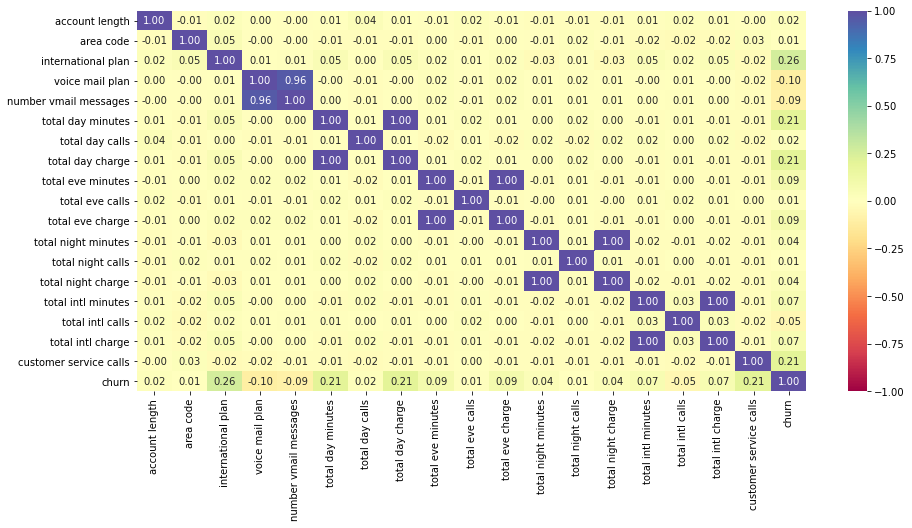

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preparation for  Modeling

### Split Data

In [20]:
df = data.copy()

In [21]:
X = df.drop(["churn"], axis=1)
y = df["churn"]

In [22]:
# creating dummies
X = pd.get_dummies(X)

In [23]:
# Splitting data into training, validation and test sets:
# First I split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we spit the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(1999, 69) (667, 69) (667, 69)


In [24]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (1999, 69)
y_train shape =  (1999,)
X_test shape =  (667, 69)
y_test shape =  (667,)


In [25]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 1999
Number of rows in validation data = 667
Number of rows in test data = 667


In [26]:
# defining a function to compute different metrics to check performance of a classification
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    acc =accuracy_score(target, pred) 
    recall = recall_score(target, pred) 
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    
    #creating a DataFrame of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])
    return df_perf

## Logistic Regression

In [29]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Evaluating the model performance by using Kfold and Cross_val_score

> K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset
>into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation 
>while the k - 1 remaining folds form the training set.

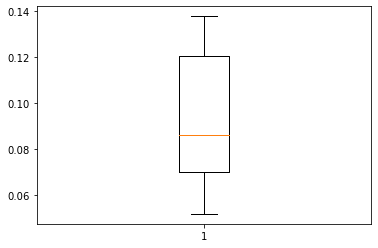

In [30]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1) # setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)

# Plotting boxplots for Cv scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [31]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training Performance")
log_reg_model_train_perf

Training Performance


,Accuracy,Recall,Precision,F1
0,0.860,0.093,0.614,0.162


In [32]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(
    lr, X_val, y_val
)
print("Validation Performance")
log_reg_model_val_perf

Validation Performance


,Accuracy,Recall,Precision,F1
0,0.855,0.082,0.500,0.142


* Logistic Regression has given a generalized performance on training and validation set.
* Let's try oversampling(increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [33]:
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [36]:
print("Before UpSampling, counts of label 'Yes' : {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No' : {}".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
) # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of labels 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of labels 'No': {}".format(sum(y_train_over == 0)))

print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes' : 289
Before UpSampling, counts of label 'No' : 1710
After UpSampling, counts of labels 'Yes': 1710
After UpSampling, counts of labels 'No': 1710
After UpSampling, the shape of train_X: (3420, 69)
After UpSampling, the shape of train_y: (3420,) 



### Logistic Regression on oversampled data

In [37]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic Logistic Regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

### Evaluating the model performance by using Kfold and Cross_val_score

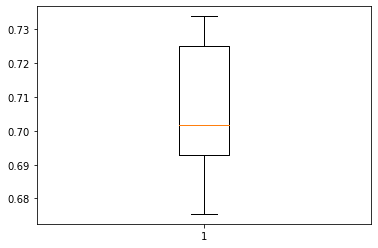

In [38]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1) # setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)

# Plotting boxplots for Cv scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance on training set varies between 0.77 to 0.80 recall
* Let's check the performance on Validation set

In [39]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training Performance")
log_reg_over_train_perf

Training Performance


,Accuracy,Recall,Precision,F1
0,0.684,0.698,0.678,0.688


In [40]:
# Calculating different metrics on train set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("Validation Performance")
log_reg_over_val_perf

Validation Performance


,Accuracy,Recall,Precision,F1
0,0.672,0.598,0.244,0.346


* Performance on the training set improved but the model is not able to replicate the same for validation set.
* Model is overfitting
* Let's try:
           a) Regularization to see if overfitting can be reduced
           b) Undersampling the train to handle the imbalance between classes and check the model performance

### Regularization

In [43]:
print('Default parameters:')
log_reg_over.get_params()

Default parameters:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Choose the type of classifier
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arrange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scroring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algoritm to the data
lr_estimator.fit(X_train_over, y_train_over)

AttributeError: module 'numpy' has no attribute 'arrange'

In [ ]:
# calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training Performance")
log_reg_reg_train_perf

In [ ]:
# calculating different metrics on val set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation Performance")
log_reg_reg_val_perf

### Undersampling train data using RandomUnderSampler

In [45]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

NameError: name 'Random' is not defined